#Problem 2 Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#reading data
data = pd.read_csv("/content/nutrition_subset.csv")

**Cleaning Data**

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

food item          0
weight_in_grams    0
saturated_fat      0
cholesterol        0
dtype: int64


>no missing values

**Sorting saturated fat**

In [6]:
saturated_fat_sorted = data.sort_values(by='saturated_fat', ascending=False)
top_5_saturated_fat = saturated_fat_sorted.head(5)
print("Top 5 Food Items Highest in Saturated Fat:")
print(top_5_saturated_fat)

Top 5 Food Items Highest in Saturated Fat:
                                  food item  weight_in_grams  saturated_fat  \
378  CHEESECAKE                    1 CAKE             1110.0          119.9   
535  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL            1188.0          118.3   
458  YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE             1108.0           92.0   
581  CREME PIE                     1 PIE               910.0           90.1   
890  LARD                          1 CUP               205.0           80.4   

     cholesterol  
378         2053  
535          703  
458          609  
581           46  
890          195  


**Saturated fat per gram**

In [8]:
data['saturated_fat_per_gram'] = data['saturated_fat'] / data['weight_in_grams']
saturated_fat_per_gram_sorted = data.sort_values(by='saturated_fat_per_gram', ascending=False)
top_5_saturated_fat_per_gram = saturated_fat_per_gram_sorted.head(5)
print("\nTop 5 Food Items Highest in Saturated Fat Per Gram:")
print(top_5_saturated_fat_per_gram)


Top 5 Food Items Highest in Saturated Fat Per Gram:
                                  food item  weight_in_grams  saturated_fat  \
908  BUTTER; SALTED                1 TBSP               14.0            7.1   
909  BUTTER; UNSALTED              1 TBSP               14.0            7.1   
710  BUTTER; UNSALTED              1/2 CUP             113.0           57.1   
709  BUTTER; SALTED                1/2 CUP             113.0           57.1   
913  BUTTER; UNSALTED              1 PAT                 5.0            2.5   

     cholesterol  saturated_fat_per_gram  
908           31                0.507143  
909           31                0.507143  
710          247                0.505310  
709          247                0.505310  
913           11                0.500000  


>Salted butter has the hgihest saturated fat per gram

**Standardize saturated fat per gram**

In [9]:
z_scores = (data['saturated_fat_per_gram'] - data['saturated_fat_per_gram'].mean()) / data['saturated_fat_per_gram'].std()
high_end_outliers = data[z_scores > 3]
low_end_outliers = data[z_scores < -3]
print("\nNumber of High-End Outliers:", len(high_end_outliers))
print("Number of Low-End Outliers:", len(low_end_outliers))


Number of High-End Outliers: 15
Number of Low-End Outliers: 0


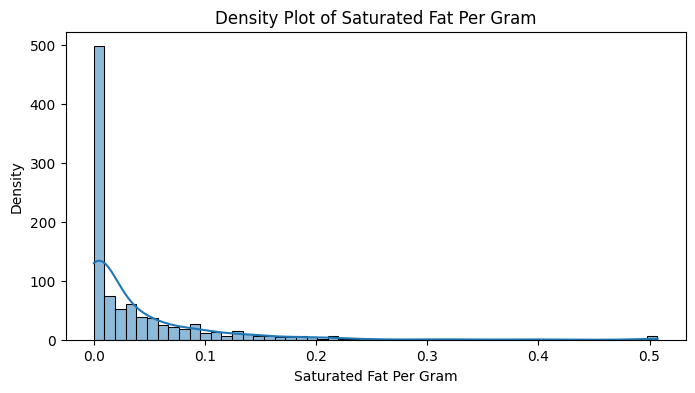

In [10]:
#create density plot
plt.figure(figsize=(8, 4))
sns.histplot(data['saturated_fat_per_gram'], kde=True)
plt.title("Density Plot of Saturated Fat Per Gram")
plt.xlabel("Saturated Fat Per Gram")
plt.ylabel("Density")
plt.show()

**Missing values**

In [12]:
# Check for missing values in the dataset
missing_values = data.isna().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
food item                 0
weight_in_grams           0
saturated_fat             0
cholesterol               0
saturated_fat_per_gram    0
dtype: int64


**Standardize numeric variables and identify outliers**

In [5]:
# Define the z-score threshold for outliers
z_threshold = 3

#numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Identify outliers in numeric variables using z-scores
z_scores = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()
outliers = ((z_scores > z_threshold) | (z_scores < -z_threshold)).sum()

# Print the count of outliers
print("\nNumber of Outliers in Numeric Variables:")
print(outliers)


Number of Outliers in Numeric Variables:
weight_in_grams    22
saturated_fat      20
cholesterol        17
dtype: int64


**Summary**

>As you can see we sorted the data by satured fat and we saw the top 5 highest saturated food items. We then created a new variable called saturated fat per gram and saw the top 5 highest foods in that category. We then saw the outliers in this category and made a density plot of saturated fat per gram. We saw in the beginning that there were no missing values and we can see the columns at the end that have outliers.